#BISMILLAH

# Fenti_Irnawati_VIX_ID/X Partners


#Soal (Questions)






    - membangun model yang dapat memprediksi credit risk menggunakan dataset yang terdiri dari data pinjaman yang diterima dan yang ditolak.

    - siapkan media visual untuk mempresentasikan solusi ke klien.

    - Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

Translate


    build a model that can predict credit risk using a dataset consisting of accepted and rejected loan data.

    prepare visual media to present the solution to the client.

    Work on this end-to-end solution can be done in the Programming Language of your choice while still referring to the Data Science framework/methodology.




**Format Pengumpulan Tugas**

    - File Code dengan format .py

    - File Python Notebook dengan format .ipynb

    - File infografis sebagai media presentasi end-to-end solution

    - Gabung ketiga file dalam satu folder ZIP yang diberi judul "[Nama Lengkap]_VIX_ID/X Partners"

    Notes: Output 3 file (Python: .py, .ipnyb) dan PPT infografis beserta penjelasannya:
    * isi code antara py dan ipynb boleh disamakan
    * ipynb/Rmd dapat disertakan penjelasan dari code dan boleh disertakan juga materi yang diketahui (dengan sumber referensi)

Translate


   
Assignment Submission Format

    Code file with .py format

    Python Notebook file with .ipynb format

    Infographic file as a media presentation of the end-to-end solution

    Combine all three files in one ZIP folder titled "[Full Name]_VIX_ID/X Partners"

Notes: Output 3 files (Python: .py, .ipnyb) and PPT infographic with explanation:

    code content between py and ipynb can be equalized
    ipynb/Rmd can include an explanation of the code and may also include known material (with reference sources)


##Fokus Masalah (Problem Focus)
    - Analisis resiko kredit cenderung gagal/berhasil, apa faktor penyertanya
    - Modelkan berdasarkan faktor penyerta apa saja yang bisa mendukung gagal/berhasilnya suatu kredit
    - Modelkan prediksi di terima atau tidaknya suatu kredit. pemodelan ini dapat mempercepat keputusan penerimaan atau penolakan dengan pertimbangan yang lebih objektif dan adil (semoga)


Translate

    - Analyze the risk of credit failure/success, what are the accompanying factors
    - Model based on the accompanying factors that can support the failure/success of a credit.
    - Model the prediction of whether or not a loan will be accepted. This modeling can speed up the decision of acceptance or rejection with more objective and fair considerations (hopefully).

##Alur Berfikir (Flow of Thinking)

    Berdasarkan soal dan fokus masalah yang di identifikasi, hal yang perlu di lakukan pertama adalah menentukan jenis solusi model machine learning apa yang akan di gunakan, yaitu, supervised learning (regression-risk management prediction), alur kerja sbb:

Translate:

    Based on the problem and the focus of the problem identified, the first thing to do is to determine what type of machine learning model solution will be used, namely, supervised learning (regression-risk management prediction), the workflow is as follows:

Outline 📚

    Loading and Exploring the data

    Cleansing and Filtering

        Working with Missing values
        working with Uniqe Data and Data types
        Dropping Unecessary columns
        Workiing with Duplicate Row
        Filtering Target data for model process

    Visualization data distribution

    Model Development

        Data preparations
        Build Linear Regression
        Build Random Forest


REMODELING
Model Development

    Dividing the data

    Using GaussianNB

    Loss Function

    Using SVC With Grid Search CV

    XGBoost Classifier

    Decision Tree Using Randomized Search

    Random Forest Using Randomized Search

    Selecting and Saving the Model







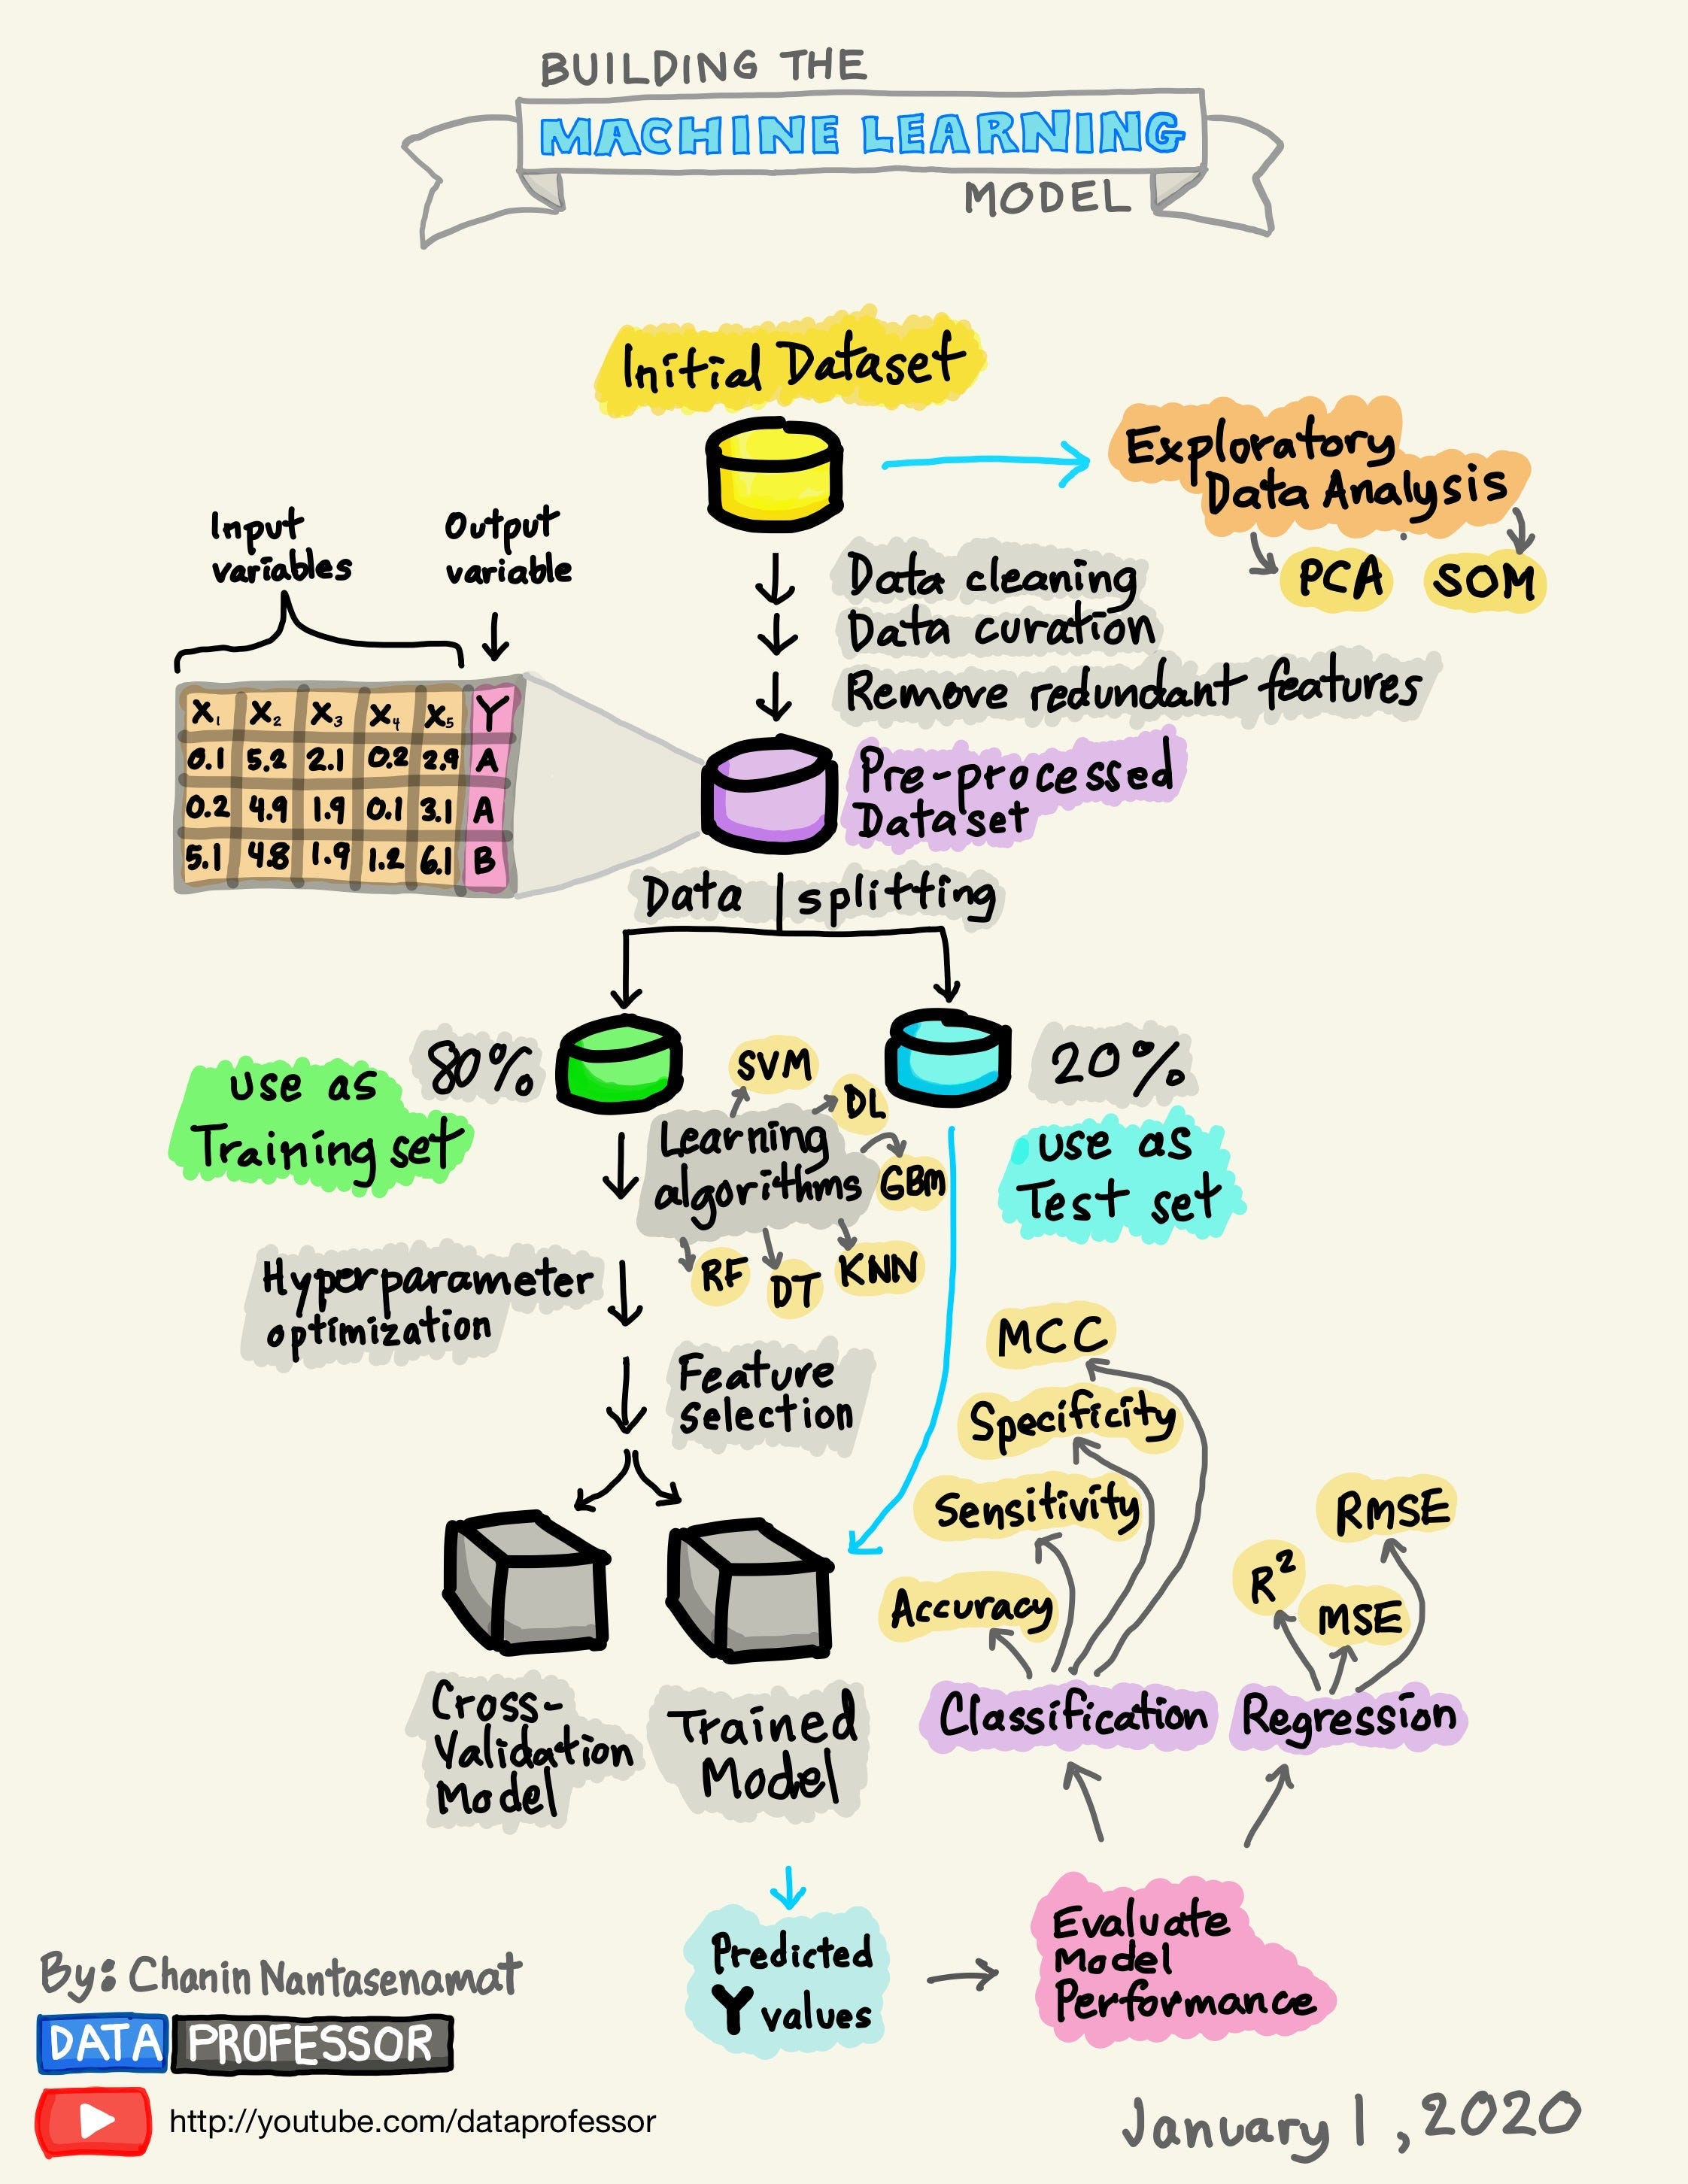

[click this](https://towardsdatascience.com/how-to-build-a-machine-learning-model-439ab8fb3fb1) https://towardsdatascience.com/how-to-build-a-machine-learning-model-439ab8fb3fb1


# Loading and Exploring the data

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy
from scipy import stats
from scipy.stats import skew
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
uploaded = files.upload()

In [ ]:
#for the alternative we can call the file from my github repo
x= pd.read_csv('https://github.com/ambufenn/Bank-repayment-prediction-ambu/blob/main/loan_data_2007_2014.csv', delimiter='\t')
x

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv("loan_data_2007_2014.csv")

df=pd.DataFrame(df)
df.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df.shape

(28061, 75)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,28061.000000,2.806100e+04,2.806100e+04,28061.000000,28061.000000,28061.000000,28060.000000,28060.000000,2.806000e+04,28060.000000,28060.000000,28060.000000,9585.000000,1482.000000,28060.000000,28060.000000,28060.000000,28042.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.0,0.0,28060.0,0.0,0.0,0.0,28060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,14030.000000,7.852712e+05,9.838452e+05,11719.626884,11439.611917,11264.217326,12.089463,326.826117,6.923565e+04,13.653771,0.149644,0.839202,37.016797,93.545884,9.326835,0.054383,13390.640413,50.014290,22.401461,194.459446,193.325627,12659.158042,12461.325001,10048.334391,2509.539966,1.077926,100.205782,9.638929,2964.449619,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8100.657288,1.571242e+05,1.792026e+05,7870.690679,7577.258474,7432.960121,4.054072,211.234402,5.065833e+04,6.679055,0.505032,1.045500,21.532007,21.002643,4.361697,0.234199,15706.986821,28.038432,11.315754,890.219970,886.343686,9474.743522,9289.089996,7306.408522,2917.470848,6.075074,682.498147,104.913520,4775.906416,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,6.694300e+04,1.829350e+05,1000.000000,1000.000000,400.000000,5.420000,20.220000,4.800000e+03,0.000000,0.000000,0.000000,1.000000,11.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7015.000000,6.473270e+05,8.277830e+05,5600.000000,5600.000000,5575.000000,8.880000,167.730000,4.200000e+04,8.490000,0.000000,0.000000,19.000000,88.000000,6.000000,0.000000,3898.000000,27.100000,14.000000,0.000000,0.000000,5645.056668,5592.170000,4660.005000,669.077500,0.000000,0.000000,0.000000,235.875000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14030.000000,7.698920e+05,9.710270e+05,10000.000000,10000.000000,9942.198028,11.710000,283.630000,6.000000e+04,13.720000,0.000000,1.000000,35.000000,98.000000,9.000000,0.000000,9017.500000,50.950000,21.000000,0.000000,0.000000,10282.780000,10149.310000,8400.000000,1405.385000,0.000000,0.000000,0.000000,594.095000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,21045.000000,8.856750e+05,1.100588e+06,15400.000000,15000.000000,15000.000000,15.200000,431.600000,8.400000e+04,18.920000,0.000000,1.000000,53.000000,108.000000,12.000000,0.000000,17062.250000,73.300000,29.000000,0.000000,0.000000,17095.275030,16864.730000,14000.000000,3194.762500,0.000000,0.000000,0.000000,3800.080000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,28060.000000,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,1.900000e+06,29.990000,11.000000,8.000000,120.000000,119.000000,39.000000,3.000000,149588.000000,99.900000,87.000000,10418.060000,10410.560000,56809.051630,56475.050000,35000.030000,23062.450000,146.040000,29623.350000,7002.1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   28061 non-null  int64  
 1   id                           28061 non-null  int64  
 2   member_id                    28061 non-null  int64  
 3   loan_amnt                    28061 non-null  int64  
 4   funded_amnt                  28061 non-null  int64  
 5   funded_amnt_inv              28061 non-null  float64
 6   term                         28061 non-null  object 
 7   int_rate                     28060 non-null  float64
 8   installment                  28060 non-null  float64
 9   grade                        28060 non-null  object 
 10  sub_grade                    28060 non-null  object 
 11  emp_title                    26281 non-null  object 
 12  emp_length                   27114 non-null  object 
 13  home_ownership  

##Addition Feature definition

In [ ]:
uploaded = files.upload()

Saving LCDataDictionary.xlsx to LCDataDictionary.xlsx


In [ ]:
#for the alternative we can call the file from my github repo
dics= pd.read_csv('')
dics

In [ ]:
dics=pd.read_excel("LCDataDictionary.xlsx").dropna()

dics=pd.DataFrame(dics)
dics

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
...,...,...,...
73,total_rec_prncp,Principal received to date,Kepala sekolah diterima hingga saat ini
74,total_rev_hi_lim,Total revolving high credit/credit limit,Total Batas Kredit/Kredit Tinggi Revolving
75,url,URL for the LC page with listing data.,URL untuk halaman LC dengan data daftar.
76,verified_status_joint,Indicates if the co-borrowers' joint income wa...,Menunjukkan jika pendapatan bersama co-peminja...


Keterangan Nama Kolom

    id: Kolom ini berisi ID untuk setiap entri dalam dataset.

    member_id: Kolom ini berisi ID anggota untuk setiap entri dalam dataset.

    loan_amnt: Kolom ini berisi jumlah pinjaman yang diminta.

    funded_amnt: Kolom ini berisi jumlah pinjaman yang disetujui.

    funded_amnt_inv: Kolom ini berisi jumlah pinjaman yang diterima oleh peminjam.

    term: Kolom ini berisi periode pinjaman dalam bentuk teks.

    int_rate: Kolom ini berisi tingkat bunga pinjaman.

    installment: Kolom ini berisi jumlah pembayaran bulanan.

    grade: Kolom ini berisi peringkat pinjaman.

    sub_grade: Kolom ini berisi sub-peringkat pinjaman.

    emp_title: Kolom ini berisi judul pekerjaan peminjam.

    emp_length: Kolom ini berisi lama waktu bekerja peminjam.

    home_ownership: Kolom ini berisi status kepemilikan rumah peminjam.

    annual_inc: Kolom ini berisi pendapatan tahunan peminjam.

    verification_status: Kolom ini berisi status verifikasi informasi peminjam.

    issue_d: Kolom ini berisi tanggal penerbitan pinjaman.

    loan_status: Kolom ini berisi status pinjaman.

    pymnt_plan: Kolom ini berisi apakah ada rencana pembayaran pinjaman.

    url: Kolom ini berisi URL terkait pinjaman.

    desc: Kolom ini berisi deskripsi pinjaman.

    purpose: Kolom ini berisi tujuan pinjaman.

    title: Kolom ini berisi judul pinjaman.

    zip_code: Kolom ini berisi kode pos peminjam.

    addr_state: Kolom ini berisi negara bagian alamat peminjam.

    dti: Kolom ini berisi rasio utang-terhadap-pendapatan (debt-to-income ratio) peminjam.

    delinq_2yrs: Kolom ini berisi jumlah tunggakan pembayaran dalam 2 tahun terakhir.

    earliest_cr_line: Kolom ini berisi tanggal pembukaan akun kredit paling awal.

    inq_last_6mths: Kolom ini berisi jumlah permintaan kredit dalam 6 bulan terakhir.

    mths_since_last_delinq: Kolom ini berisi jumlah bulan sejak tunggakan pembayaran terakhir.

    mths_since_last_record: Kolom ini berisi jumlah bulan sejak catatan tunggakan terakhir.

    open_acc: Kolom ini berisi jumlah rekening yang terbuka saat ini.

    pub_rec: Kolom ini berisi jumlah catatan publik yang ada.

    revol_bal: Kolom ini berisi saldo utang yang berputar (revolving balance).

    revol_util: Kolom ini berisi penggunaan total dari semua kredit berputar.

    total_acc: Kolom ini berisi jumlah total rekening yang dilaporkan.

    initial_list_status: Kolom ini berisi status awal daftar pinjaman.

    out_prncp: Kolom ini berisi saldo pokok pinjaman yang belum terbayar.

    out_prncp_inv: Kolom ini berisi saldo pokok pinjaman yang belum terbayar yang telah diinvestasikan.

    total_pymnt: Kolom ini berisi total pembayaran yang telah dilakukan.

    total_pymnt_inv: Kolom ini berisi total pembayaran yang telah dilakukan yang telah diinvestasikan.

    total_rec_prncp: Kolom ini berisi total saldo pokok yang telah diterima.

    total_rec_int: Kolom ini berisi total bunga yang telah diterima.

    total_rec_late_fee: Kolom ini berisi total denda keterlambatan yang telah diterima.

    recoveries: Kolom ini berisi jumlah pemulihan yang telah diterima.

    collection_recovery_fee: Kolom ini berisi biaya pemulihan yang telah diterima.

    last_pymnt_d: Kolom ini berisi tanggal terakhir pembayaran dilakukan.

    last_pymnt_amnt: Kolom ini berisi jumlah terakhir pembayaran dilakukan.

    next_pymnt_d: Kolom ini berisi tanggal pembayaran berikutnya.

    last_credit_pull_d: Kolom ini berisi tanggal terakhir data kredit diperbarui.

    collections_12_mths_ex_med: Kolom ini berisi jumlah koleksi yang dikumpulkan dalam 12 bulan terakhir, tidak termasuk koleksi medis.

    mths_since_last_major_derog: Kolom ini berisi jumlah bulan sejak kejadian negatif utama terakhir.

    policy_code: Kolom ini berisi kode kebijakan pinjaman.

    application_type: Kolom ini berisi jenis aplikasi pinjaman.

    annual_inc_joint: Kolom ini berisi pendapatan tahunan bersama (jika ada).

    dti_joint: Kolom ini berisi rasio utang-terhadap-pendapatan bersama (jika ada).

    verification_status_joint: Kolom ini berisi status verifikasi informasi bersama (jika ada).

    acc_now_delinq: Kolom ini berisi jumlah akun yang sedang dalam penungguan pembayaran saat ini.

    tot_coll_amt: Kolom ini berisi total jumlah tagihan yang tertunggak.

    tot_cur_bal: Kolom ini berisi total saldo saat ini dari semua akun yang dilaporkan.

    open_acc_6m: Kolom ini berisi jumlah akun yang terbuka dalam 6 bulan terakhir.

    open_il_6m: Kolom ini berisi jumlah akun instalasi yang terbuka dalam 6 bulan terakhir.

    open_il_12m: Kolom ini berisi jumlah akun instalasi yang terbuka dalam 12 bulan terakhir.

    open_il_24m: Kolom ini berisi jumlah akun instalasi yang terbuka dalam 24 bulan terakhir.

    mths_since_rcnt_il: Kolom ini berisi jumlah bulan sejak akun instalasi yang terbuka terakhir.

    total_bal_il: Kolom ini berisi saldo total dari semua akun instalasi.

    il_util: Kolom ini berisi rasio penggunaan instalasi.

    open_rv_12m: Kolom ini berisi jumlah akun kartu yang terbuka dalam 12 bulan terakhir.

    open_rv_24m: Kolom ini berisi jumlah akun kartu yang terbuka dalam 24 bulan terakhir.

    max_bal_bc: Kolom ini berisi saldo tertinggi yang pernah diperoleh pada kartu kredit.

    all_util: Kolom ini berisi rasio penggunaan total dari semua akun.

    total_rev_hi_lim: Kolom ini berisi jumlah total batas kredit revolving tinggi.

    inq_fi: Kolom ini berisi jumlah permintaan keuangan dalam beberapa bulan terakhir.

    total_cu_tl: Kolom ini berisi jumlah akun kredit yang dibuka dalam beberapa bulan terakhir.

    inq_last_12m: Kolom ini berisi jumlah permintaan kredit dalam 12 bulan terakhir.

#Cleansing and Data Filtering

##Missing Value and its Percentage / NAN

<Axes: >

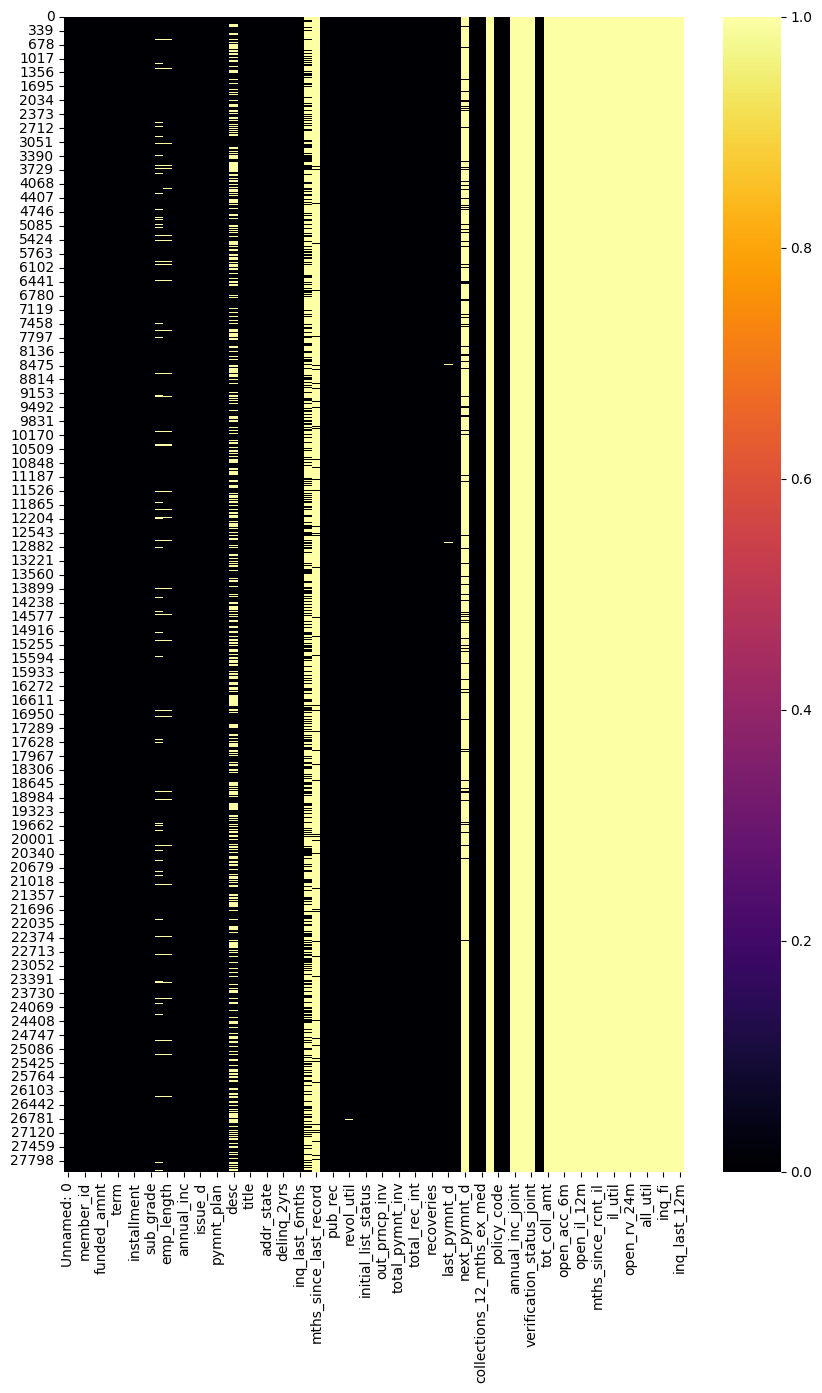

In [ ]:
#kita lihat dulu grafik ini lalu bertanya , ini NAN atau NULL?

fig = plt.figure(figsize=(10,15))
sns.heatmap(df.isna(),cmap='inferno')



In [ ]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentages = (missing_values / len(df)) * 100

# Create a new DataFrame to store the missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentages})

# Sort the DataFrame by percentage in descending order
missing_data = missing_data.sort_values('Percentage', ascending=False)

# Print the missing data
print(missing_data)


                             Missing Values  Percentage
inq_last_12m                          28061       100.0
dti_joint                             28061       100.0
annual_inc_joint                      28061       100.0
mths_since_last_major_derog           28061       100.0
tot_coll_amt                          28061       100.0
...                                     ...         ...
funded_amnt_inv                           0         0.0
funded_amnt                               0         0.0
loan_amnt                                 0         0.0
member_id                                 0         0.0
Unnamed: 0                                0         0.0

[75 rows x 2 columns]


In [ ]:
def missing_values(df):
    a = num_null_values = df.isnull().sum()
    return a

In [ ]:
missing_values(df)

Unnamed: 0              0
id                      0
member_id               0
loan_amnt               0
funded_amnt             0
                    ...  
all_util            28061
total_rev_hi_lim    28061
inq_fi              28061
total_cu_tl         28061
inq_last_12m        28061
Length: 75, dtype: int64

    -di lihat dari grafik data, data kosong ini adalah NAN (bisa juga null)untuk olah data sepertinya kolom ini harus di hapus.


    -Looking at the data graph, this blank data is a NAN (can also be null) for data processing, it seems that this column should be deleted.

##Null Value

    Adanya null value dalam dataset dapat memiliki implikasi yang signifikan dalam analisis data, seperti:

    Penyimpangan statistik: Null value dapat mempengaruhi perhitungan statistik seperti mean, median, atau deviasi standar. Jika null value tidak ditangani dengan benar, dapat menghasilkan estimasi yang bias atau tidak akurat.

    Kehilangan informasi: Null value mengindikasikan bahwa ada informasi yang hilang dalam dataset. Hal ini dapat mengurangi kelengkapan dan keberhasilan analisis data, terutama jika jumlah null value yang signifikan.

    Analisis yang tidak akurat: Jika null value tidak ditangani dengan benar, dapat menghasilkan hasil analisis yang tidak akurat atau bias. Misalnya, jika null value diabaikan atau diisi dengan nilai yang salah, ini dapat menghasilkan kesimpulan yang keliru.

    Kesalahan dalam model prediksi: Null value dapat menyebabkan masalah dalam membangun model prediksi. Beberapa algoritma atau metode tidak dapat menangani null value secara langsung, dan memerlukan penanganan khusus seperti imputasi (pengisian nilai yang hilang) atau penghapusan data yang memiliki null value.

Translate

    The presence of null values in a dataset can have significant implications in data analysis, such as:

    Statistical deviations: Null values can affect statistical calculations such as mean, median, or standard deviation. If null values are not handled properly, they can result in biased or inaccurate estimates.

    Missing information: Null values indicate that there is missing information in the dataset. This can reduce the completeness and success of data analysis, especially if the number of null values is significant.

    Inaccurate analysis: If null values are not handled properly, it can result in inaccurate or biased analysis results. For example, if null values are ignored or filled with incorrect values, this can lead to erroneous conclusions.

    Errors in prediction models: Null values can cause problems in building prediction models. Some algorithms or methods cannot handle null values directly, and require special handling such as imputation (filling in missing values) or removal of data that has null values.

In [ ]:
nulls = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
tot_cur_bal,100.00
open_acc_6m,100.00
total_cu_tl,100.00
inq_fi,100.00
total_rev_hi_lim,100.00
all_util,100.00
max_bal_bc,100.00
open_rv_24m,100.00
open_rv_12m,100.00
il_util,100.00


In [ ]:
# Menghitung persentase nilai yang hilang dalam setiap kolom
null_percent = round(df.isnull().sum() / len(df.index) * 100, 2)

# Mendapatkan daftar kolom yang memiliki persentase nilai yang hilang di atas 10%
cols_to_drop = null_percent[null_percent > 10].index.tolist()

# Menjatuhkan (drop) kolom-kolom yang memiliki nilai yang hilang di atas 10%
df = df.drop(cols_to_drop, axis=1)


In [ ]:
df.shape

(28061, 50)

<Axes: >

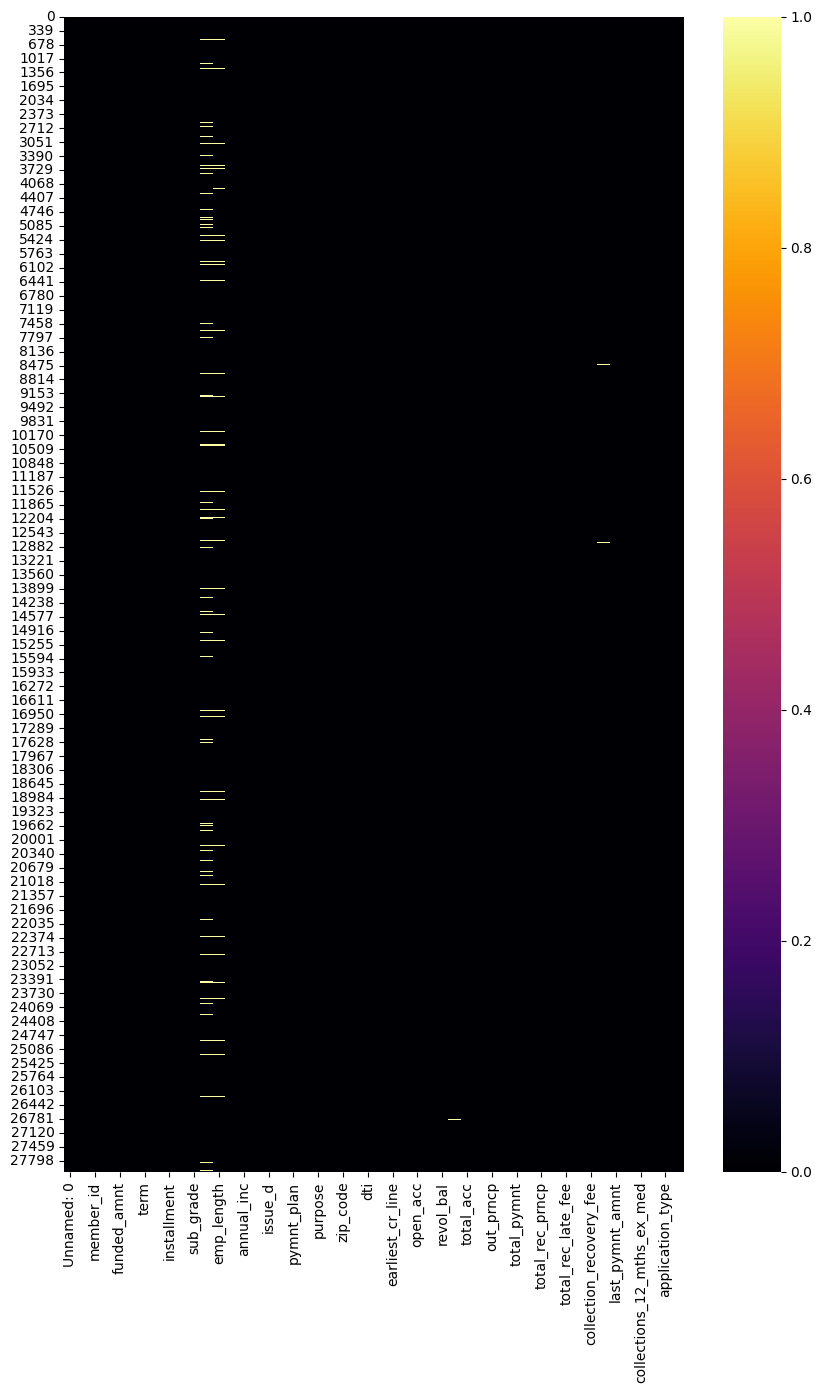

In [ ]:
fig = plt.figure(figsize=(10,15))
sns.heatmap(df.isna(),cmap='inferno')



i think better , even still have , liitle bit soft-yellow

Another things we would want to examine is that how many loans have a default loan status in comparison to other loans. A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         1
installment                      1
grade                            1
sub_grade                        1
emp_title                     1780
emp_length                     947
home_ownership                   1
annual_inc                       1
verification_status              1
issue_d                          1
loan_status                      1
pymnt_plan                       1
url                              1
purpose                          1
title                            3
zip_code                         1
addr_state                       1
dti                              1
delinq_2yrs                      1
earliest_cr_line                 1
inq_last_6mths                   1
open_acc            

still need more insight for stabilize these data emp_title                     1780
emp_length                     947
ect
its important data or not, could i drop it or not


## Uniqe Data, Data type, and Column Dropping

informasi data unik:

    dapat mengidentifikasi kategori-kategori tersebut dan melihat distribusi data dalam setiap kategori.

    menggunakan informasi jumlah nilai unik dalam pemilihan fitur. Jika suatu kolom memiliki jumlah nilai unik yang sangat rendah (misalnya, hanya 1 atau 2 nilai unik), kolom tersebut mungkin tidak memberikan informasi yang signifikan dan dapat diabaikan dalam analisis selanjutnya.

    Informasi tipe data dapat membantu memahami jenis nilai yang ada dalam kolom. Misalnya, jika tipe data kolom adalah objek, ini mungkin menunjukkan bahwa kolom tersebut berisi data teks atau kategori yang perlu diubah menjadi tipe data yang sesuai.

    dapat melakukan pemeriksaan integritas data. Jika ada kolom dengan jumlah nilai unik yang tidak sesuai dengan harapan (misalnya, kolom dengan hanya beberapa nilai unik pada kolom yang seharusnya berisi lebih banyak variasi), mungkin ada kesalahan atau masalah dalam pengumpulan atau pengolahan data.

    Analisis variabel target: Jumlah nilai unik dalam kolom target (misalnya, kolom 'loan_status' dalam contoh yang diberikan) dapat memberikan wawasan tentang seimbang atau tidak seimbangnya kelas target. Ini dapat membantu  dalam pemahaman awal tentang masalah klasifikasi atau regresi yang mungkin dihadapi.


Translate

    unique data information:

    can identify the categories and see the distribution of data within each category.

    using unique value count information in feature selection. If a column has a very low number of unique values (for example, only 1 or 2 unique values), the column may not provide significant information and can be ignored in further analysis.

    Data type information can help understand the type of values present in the column. For example, if a column's data type is object, it may indicate that the column contains text or category data that needs to be converted into the appropriate data type.

    can perform data integrity checks. If there are columns with a number of unique values that do not match expectations (for example, columns with only a few unique values in a column that should contain more variety), there may be errors or problems in data collection or processing.

    Target variable analysis: The number of unique values in a target column (e.g., the 'loan_status' column in the given example) can provide insight into the balance or imbalance of the target class. This can help in the initial understanding of classification or regression issues that may be encountered.

In [ ]:

# Mengklasifikasikan jumlah nilai unik dan tipe data pada setiap kolom
data_type_counts = pd.DataFrame({'nunique': df.nunique(), 'data type': df.dtypes})

# Menampilkan hasil klasifikasi
print(data_type_counts)


                            nunique data type
Unnamed: 0                    28061     int64
id                            28061     int64
member_id                     28061     int64
loan_amnt                       847     int64
funded_amnt                    1015     int64
funded_amnt_inv                3726   float64
term                              3    object
int_rate                        189   float64
installment                   11189   float64
grade                             7    object
sub_grade                        35    object
emp_title                     21040    object
emp_length                       11    object
home_ownership                    4    object
annual_inc                     3884   float64
verification_status               3    object
issue_d                          18    object
loan_status                       7    object
pymnt_plan                        2    object
url                           28060    object
purpose                          1

In [ ]:
# Mengidentifikasi kolom dengan jumlah nilai unik yang rendah
low_unique_cols = []
for column in df.columns:
    unique_count = df[column].nunique()
    if unique_count <= 1:
        low_unique_cols.append(column)

# Menampilkan kolom dengan jumlah nilai unik yang rendah
print("Kolom dengan jumlah nilai unik rendah:")
print(low_unique_cols)

Kolom dengan jumlah nilai unik rendah:
['initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq']


    kolom rendah unik sepertinya masih bisa di wakili oleh kolom lain, maka saya putuskan untuk menghapus kolom tersebut

    the low unique column seems to be represented by another column, so I decided to delete the column.

Droping kolom,
i literally have decided which more important than, for prediction i mean, little bit tricky for me

In [ ]:
df.drop(low_unique_cols, axis=1, inplace=True)


In [ ]:
df.shape

(28061, 45)

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [ ]:
df.drop(['url', 'sub_grade', 'last_pymnt_d', 'pymnt_plan','issue_d', 'earliest_cr_line', 'emp_title','title', 'zip_code', 'addr_state','last_credit_pull_d'], axis=1, inplace=True)

In [ ]:
df.shape

(28061, 34)

In [ ]:
int64_cols = df.select_dtypes(include=['int64']).columns
int64_cols

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt'], dtype='object')

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.shape

(28061, 33)

In [ ]:
float64_cols = df.select_dtypes(include=['float64']).columns
float64_cols

Index(['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

In [ ]:
df.drop(['out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt','total_acc', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec'], axis=1, inplace=True)

In [ ]:
df.shape

(28061, 18)

In [ ]:
df.drop(['open_acc'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28061 non-null  int64  
 1   member_id            28061 non-null  int64  
 2   loan_amnt            28061 non-null  int64  
 3   funded_amnt          28061 non-null  int64  
 4   funded_amnt_inv      28061 non-null  float64
 5   term                 28061 non-null  object 
 6   int_rate             28060 non-null  float64
 7   installment          28060 non-null  float64
 8   grade                28060 non-null  object 
 9   emp_length           27114 non-null  object 
 10  home_ownership       28060 non-null  object 
 11  annual_inc           28060 non-null  float64
 12  verification_status  28060 non-null  object 
 13  loan_status          28060 non-null  object 
 14  purpose              28060 non-null  object 
 15  dti                  28060 non-null 

## Duplicate Row

In [ ]:
# Memeriksa keberadaan baris duplikat
duplicate_rows = df.duplicated()

# Menghitung jumlah baris duplikat
num_duplicate_rows = duplicate_rows.sum()

# Menampilkan baris duplikat
duplicate_data = df[duplicate_rows]

# Menampilkan hasil
if num_duplicate_rows > 0:
    print(f"Ada {num_duplicate_rows} baris duplikat dalam DataFrame:")
    print(duplicate_data)
else:
    print("Tidak ada baris duplikat dalam DataFrame. No Duplicate")

Tidak ada baris duplikat dalam DataFrame. No Duplicate


ubah tipe data / reformat data, akan di kerjakan ketika ada bugs ketidakcocokan type data

## Target Data

In [ ]:


df['loan_status'].value_counts()

Fully Paid            21957
Charged Off            4042
Current                1960
Late (31-120 days)       51
In Grace Period          28
Late (16-30 days)        13
Default                   9
Name: loan_status, dtype: int64

In [ ]:
# Membuat fungsi untuk mengelompokkan nilai loan_status
def categorize_loan_status(status):
    if status in ['Fully Paid', 'Current']:
        return 'Approved'
    else:
        return 'Disapproved'

# Menggunakan fungsi untuk membuat kolom baru 'loan_status_category'
df['loan_status_category'] = df['loan_status'].apply(categorize_loan_status)

# Mencetak jumlah pinjaman dalam setiap kategori
print(df['loan_status_category'].value_counts())


Approved       23917
Disapproved     4144
Name: loan_status_category, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28061 non-null  int64  
 1   member_id             28061 non-null  int64  
 2   loan_amnt             28061 non-null  int64  
 3   funded_amnt           28061 non-null  int64  
 4   funded_amnt_inv       28061 non-null  float64
 5   term                  28061 non-null  object 
 6   int_rate              28060 non-null  float64
 7   installment           28060 non-null  float64
 8   grade                 28060 non-null  object 
 9   emp_length            27114 non-null  object 
 10  home_ownership        28060 non-null  object 
 11  annual_inc            28060 non-null  float64
 12  verification_status   28060 non-null  object 
 13  loan_status           28060 non-null  object 
 14  purpose               28060 non-null  object 
 15  dti                

In [ ]:
df.drop(['loan_status'], axis=1, inplace=True)

In [ ]:
df.rename(columns={'loan_status_category': 'loan_status'}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28061 non-null  int64  
 1   member_id            28061 non-null  int64  
 2   loan_amnt            28061 non-null  int64  
 3   funded_amnt          28061 non-null  int64  
 4   funded_amnt_inv      28061 non-null  float64
 5   term                 28061 non-null  object 
 6   int_rate             28060 non-null  float64
 7   installment          28060 non-null  float64
 8   grade                28060 non-null  object 
 9   emp_length           27114 non-null  object 
 10  home_ownership       28060 non-null  object 
 11  annual_inc           28060 non-null  float64
 12  verification_status  28060 non-null  object 
 13  purpose              28060 non-null  object 
 14  dti                  28060 non-null  float64
 15  revol_bal            28060 non-null 

In [ ]:
df.drop(['Unnamed: 0', 'member_id'], axis=1, inplace=True)

In [ ]:
df.shape

(28061, 16)

In [ ]:
import pandas as pd
import re


# Remove letters and symbols from the "term" column using regular expressions
df['term'] = df['term'].apply(lambda x: re.sub('[^0-9]+', '', str(x)))


# Print the DataFrame after removing letters and symbols from the "term" and "emp_length" column
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,revol_bal,revol_util,loan_status
0,5000,5000,4975.00000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,27.65,13648.0,83.7,Approved
1,2500,2500,2500.00000,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,car,1.00,1687.0,9.4,Disapproved
2,2400,2400,2400.00000,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,8.72,2956.0,98.5,Approved
3,10000,10000,10000.00000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,20.00,5598.0,21.0,Approved
4,3000,3000,3000.00000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,other,17.94,27783.0,53.9,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28056,25000,25000,24860.83998,60,20.16,664.58,G,3 years,MORTGAGE,103000.0,Verified,credit_card,8.00,72012.0,32.4,Approved
28057,11000,11000,10950.00000,60,13.61,253.74,C,2 years,RENT,48000.0,Not Verified,debt_consolidation,20.10,10848.0,63.8,Approved
28058,14400,11250,11050.00000,60,10.75,243.21,B,5 years,MORTGAGE,56000.0,Not Verified,other,18.06,2464.0,15.7,Disapproved
28059,11350,11350,11325.00000,36,7.88,355.04,A,6 years,RENT,43200.0,Source Verified,major_purchase,8.67,2877.0,22.3,Approved


In [ ]:
# Extract the numeric part from the term column and convert to integers
df['term'] = df['term'].str.extract('(\d+)').astype(int)

# Verify the updated term column
print(df['term'])

0        36
1        60
2        36
3        36
4        60
         ..
28056    60
28057    60
28058    60
28059    36
28060    60
Name: term, Length: 28061, dtype: int64


In [ ]:
# Mapping dictionary to convert emp_length values to numerical representation
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Convert emp_length column to numerical representation
df['emp_length'] = df['emp_length'].map(emp_length_mapping)

# Verify the updated emp_length column
print(df['emp_length'])


0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
28056     3.0
28057     2.0
28058     5.0
28059     6.0
28060     NaN
Name: emp_length, Length: 28061, dtype: float64


In [ ]:
df.to_csv('EDA_rakamin.csv', index=False)


In [ ]:
from google.colab import files

files.download('EDA_rakamin.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



#Visualisation Data Distributions

Feature Selection

    untuk saat ini saya mencoba mempertimbangkan 16 kolom yang akan di olah. untuk kolom lain dapat di pertimbangkan kembali setelah diskusi lebih detail dengan divisi lainya.

    For now, I am trying to consider the 16 columns that will be processed. Other columns can be reconsidered after more detailed discussions with other divisions.
---


    loan_amnt: Jumlah pinjaman yang diajukan.
    funded_amnt: Jumlah pinjaman yang disetujui untuk didanai.
    funded_amnt_inv: Jumlah pinjaman yang sebenarnya diterima oleh peminjam.
    term: Jangka waktu pinjaman dalam format teks (misalnya, "36 months").
    int_rate: Tingkat bunga pinjaman sebagai pecahan desimal.
    installment: Jumlah pembayaran bulanan yang harus dibayarkan oleh peminjam.
    grade: Tingkatan risiko pinjaman yang diberikan oleh pemberi pinjaman.
    emp_length: Jangka waktu pengalaman kerja peminjam dalam format teks (misalnya, "10+ years").
    home_ownership: Status kepemilikan rumah oleh peminjam (misalnya, "MORTGAGE", "RENT", "OWN").
    annual_inc: Pendapatan tahunan peminjam.
    verification_status: Status verifikasi informasi peminjam oleh pemberi pinjaman.
    purpose: Tujuan penggunaan pinjaman oleh peminjam.
    dti: Rasio utang-terhadap-pendapatan (Debt-to-Income Ratio) peminjam.
    revol_bal: Jumlah saldo total dari semua akun revolving (misalnya, kartu kredit) peminjam.
    revol_util: Tingkat penggunaan total kredit revolving oleh peminjam sebagai pecahan desimal.
    loan_status: Status pinjaman, yang telah dijelaskan sebelumnya.


---



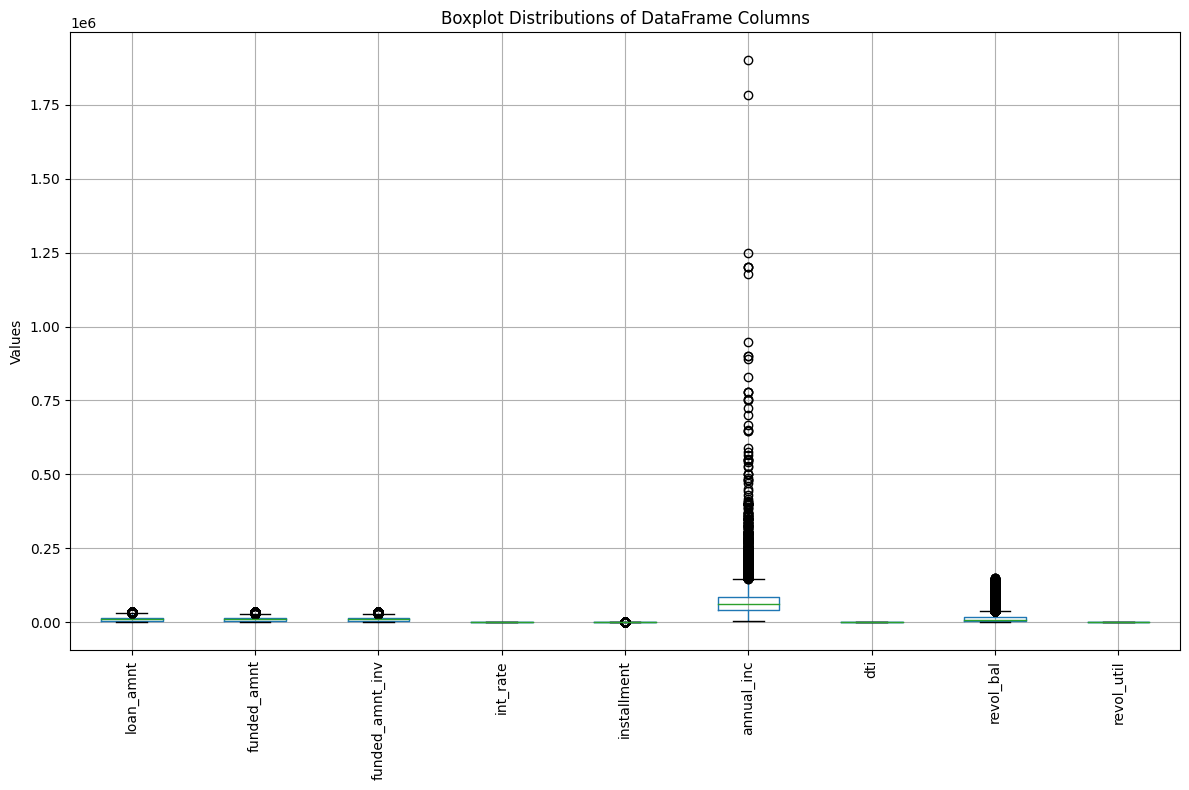

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create boxplot visualizations for all columns
plt.figure(figsize=(12, 8))  # Set the size of the figure
df.boxplot(rot=90)  # Create boxplots for all columns with rotation of x-axis labels
plt.title('Boxplot Distributions of DataFrame Columns')  # Set the title of the plot
plt.ylabel('Values')  # Set the label for the y-axis
plt.tight_layout()  # Adjust the layout of the plot
plt.show()  # Show the plot


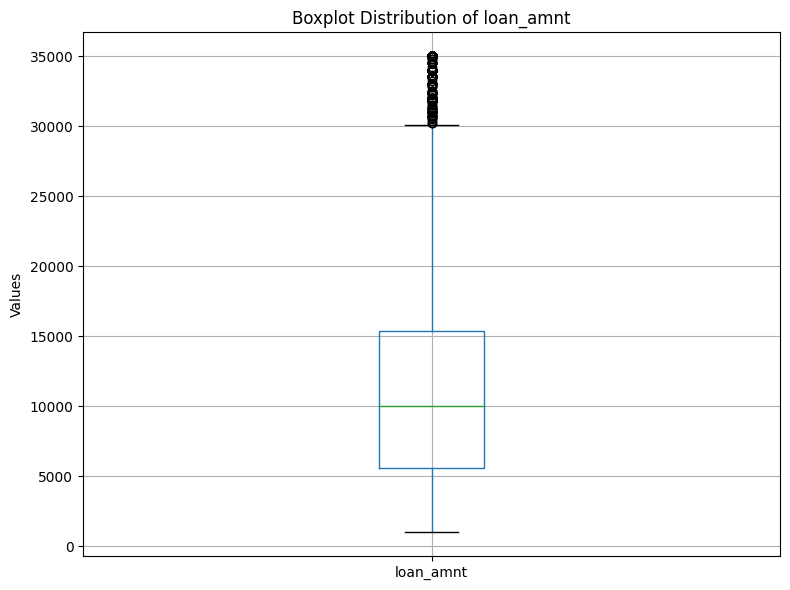

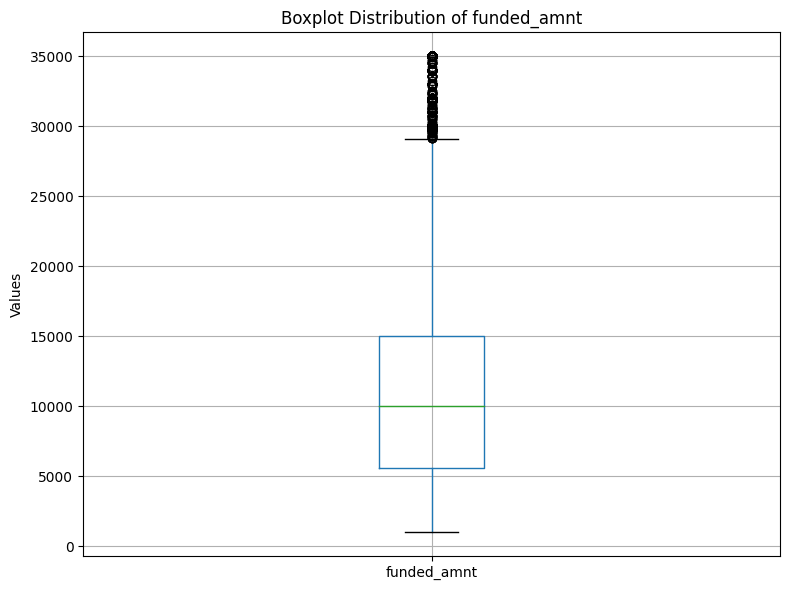

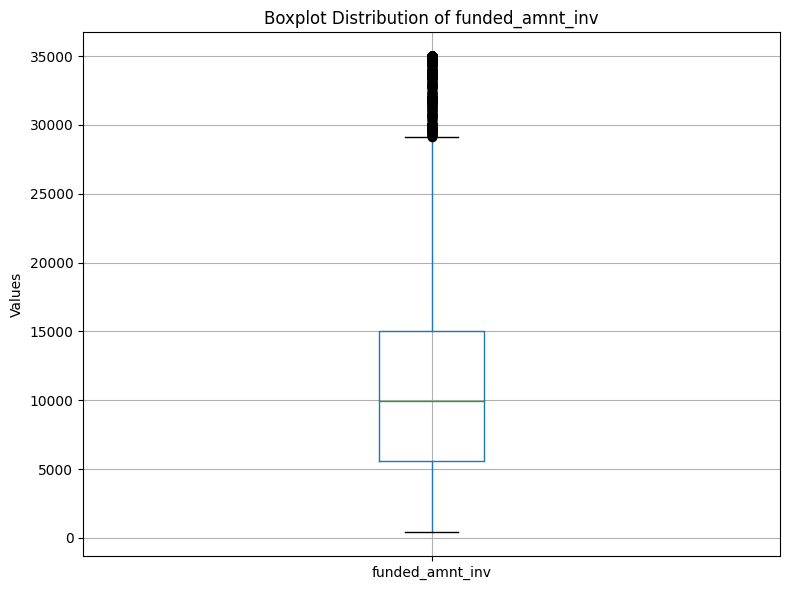

KeyError: ignored

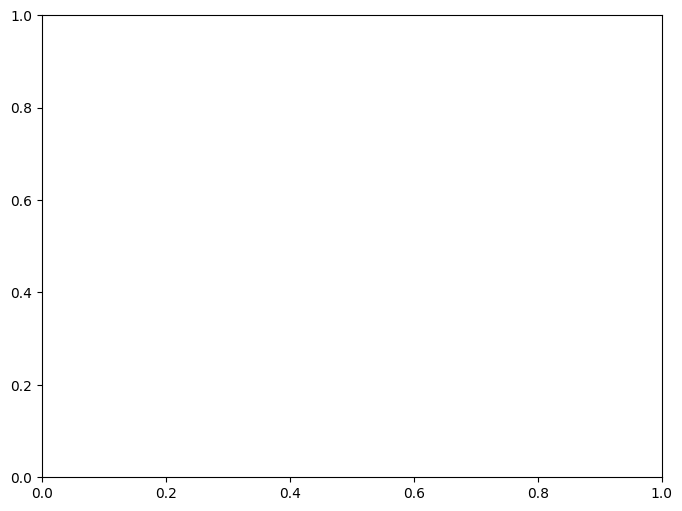

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create individual boxplot visualizations for each column
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Set the size of the figure
    df.boxplot(column=[column])  # Create a boxplot for the current column
    plt.title(f'Boxplot Distribution of {column}')  # Set the title of the plot
    plt.ylabel('Values')  # Set the label for the y-axis
    plt.tight_layout()  # Adjust the layout of the plot
    plt.show()  # Show the plot


In [ ]:
### Visualization###
def bar_chart(col):
    Approved = df[df["loan_status"]=="Approved"][col].value_counts()
    Disapproved = df[df["loan_status"]=="Disapproved"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    df1.plot(kind="bar")

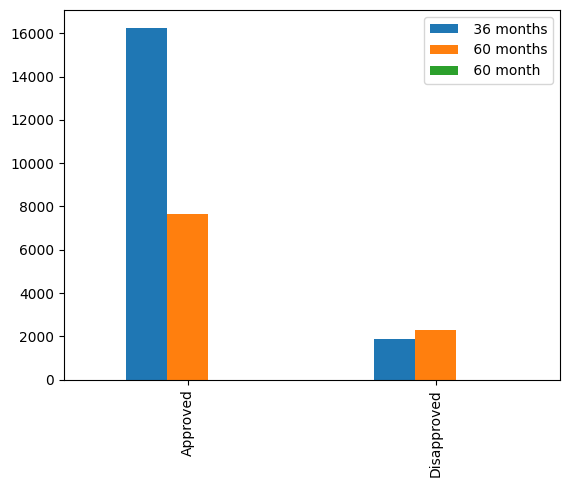

In [ ]:
bar_chart("term")

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

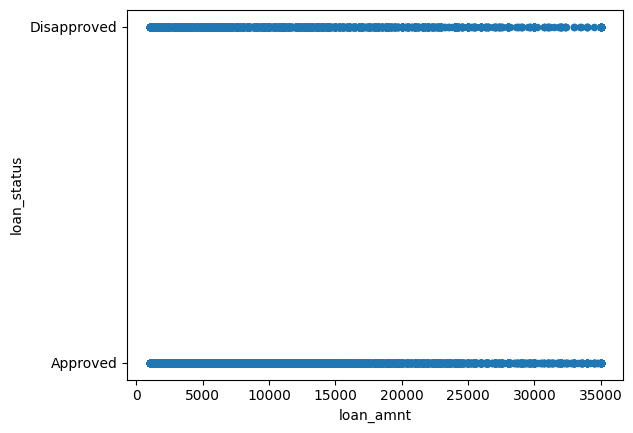

In [ ]:
df.plot(kind='scatter', x='loan_amnt', y='loan_status')


give me a time, lemme think what best firtvisualisation tipes to use

Boxplots are commonly used to visualize the distribution of numerical data. Therefore, it is generally suitable to create boxplots for columns with numerical or ordinal data types. Some common data types that can be effectively visualized with boxplots include:

    Numeric data: Continuous numerical data, such as age, income, or loan amount.
    Ordinal data: Categorical data with a natural order, such as education level (e.g., high school, bachelor's, master's) or employment seniority (e.g., junior, mid-level, senior).
    Time-based data: Dates or timestamps that can be converted to numeric values, allowing for temporal analysis.
    Count data: Discrete data representing counts, such as the number of occurrences or events.

On the other hand, boxplots are not suitable for columns with certain data types, including:

    Text data: Non-numeric data such as names, addresses, or descriptions. These types of data do not have a natural distribution that can be represented by a boxplot.
    Boolean data: Binary data with only two possible values, such as true/false or yes/no. Boxplots are not meaningful for visualizing such data.
    Nominal categorical data: Categorical data without a natural order or hierarchy, such as colors or categories that are not inherently ranked.

For columns with text or categorical data, alternative visualizations like bar plots, pie charts, or frequency histograms may be more appropriate.

i see outlier in annual income, i still doubting about it

#Model Building

##Data Preparations

In [ ]:
uploaded = files.upload()

In [ ]:
df2= pd.read_csv('EDA_rakamin.csv')
df2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,revol_bal,revol_util,loan_status
0,5000,5000,4975.00000,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,credit_card,27.65,13648.0,83.7,Approved
1,2500,2500,2500.00000,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,car,1.00,1687.0,9.4,Disapproved
2,2400,2400,2400.00000,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,small_business,8.72,2956.0,98.5,Approved
3,10000,10000,10000.00000,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,other,20.00,5598.0,21.0,Approved
4,3000,3000,3000.00000,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,other,17.94,27783.0,53.9,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28056,25000,25000,24860.83998,60,20.16,664.58,G,3.0,MORTGAGE,103000.0,Verified,credit_card,8.00,72012.0,32.4,Approved
28057,11000,11000,10950.00000,60,13.61,253.74,C,2.0,RENT,48000.0,Not Verified,debt_consolidation,20.10,10848.0,63.8,Approved
28058,14400,11250,11050.00000,60,10.75,243.21,B,5.0,MORTGAGE,56000.0,Not Verified,other,18.06,2464.0,15.7,Disapproved
28059,11350,11350,11325.00000,36,7.88,355.04,A,6.0,RENT,43200.0,Source Verified,major_purchase,8.67,2877.0,22.3,Approved


re crosscheck EDA

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            28061 non-null  int64  
 1   funded_amnt          28061 non-null  int64  
 2   funded_amnt_inv      28061 non-null  float64
 3   term                 28061 non-null  int64  
 4   int_rate             28060 non-null  float64
 5   installment          28060 non-null  float64
 6   grade                28060 non-null  object 
 7   emp_length           27114 non-null  float64
 8   home_ownership       28060 non-null  object 
 9   annual_inc           28060 non-null  float64
 10  verification_status  28060 non-null  object 
 11  purpose              28060 non-null  object 
 12  dti                  28060 non-null  float64
 13  revol_bal            28060 non-null  float64
 14  revol_util           28042 non-null  float64
 15  loan_status          28061 non-null 

In [ ]:
df2.isnull().sum()

loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 1
installment              1
grade                    1
emp_length             947
home_ownership           1
annual_inc               1
verification_status      1
purpose                  1
dti                      1
revol_bal                1
revol_util              19
loan_status              0
dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
loan_status_mapping = {'Approved': 1, 'Disapproved': 2}
df2['loan_status'] = df2['loan_status'].replace(loan_status_mapping)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27099 entries, 0 to 28059
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            27099 non-null  int64  
 1   funded_amnt          27099 non-null  int64  
 2   funded_amnt_inv      27099 non-null  float64
 3   term                 27099 non-null  int64  
 4   int_rate             27099 non-null  float64
 5   installment          27099 non-null  float64
 6   grade                27099 non-null  object 
 7   emp_length           27099 non-null  float64
 8   home_ownership       27099 non-null  object 
 9   annual_inc           27099 non-null  float64
 10  verification_status  27099 non-null  object 
 11  purpose              27099 non-null  object 
 12  dti                  27099 non-null  float64
 13  revol_bal            27099 non-null  float64
 14  revol_util           27099 non-null  float64
 15  loan_status          27099 non-null 

In [ ]:
df2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,revol_bal,revol_util,loan_status
0,5000,5000,4975.00000,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,credit_card,27.65,13648.0,83.7,1
1,2500,2500,2500.00000,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,car,1.00,1687.0,9.4,2
2,2400,2400,2400.00000,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,small_business,8.72,2956.0,98.5,1
3,10000,10000,10000.00000,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,other,20.00,5598.0,21.0,1
4,3000,3000,3000.00000,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,other,17.94,27783.0,53.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28055,14400,10450,10371.80453,60,15.95,253.85,D,0.0,RENT,54000.0,Not Verified,debt_consolidation,16.29,14069.0,79.9,1
28056,25000,25000,24860.83998,60,20.16,664.58,G,3.0,MORTGAGE,103000.0,Verified,credit_card,8.00,72012.0,32.4,1
28057,11000,11000,10950.00000,60,13.61,253.74,C,2.0,RENT,48000.0,Not Verified,debt_consolidation,20.10,10848.0,63.8,1
28058,14400,11250,11050.00000,60,10.75,243.21,B,5.0,MORTGAGE,56000.0,Not Verified,other,18.06,2464.0,15.7,2


In [ ]:
# Mengubah kolom 'term' menjadi tipe data numerik
df2['term'] = df2['term'].astype(int)

In [ ]:
# Menghapus kolom 'grade'
df2.drop('grade', axis=1, inplace=True)
# Menghapus kolom 'purpose'
df2.drop('purpose', axis=1, inplace=True)


In [ ]:
# Mengubah kolom 'emp_length' menjadi tipe data numerik
df2['emp_length'] = df2['emp_length'].astype(str).str.extract('(\d+)').astype(float)


In [ ]:
# Mengubah kolom 'home_ownership' menjadi tipe data numerik
ownership_mapping = {'OWN': 1, 'MORTGAGE': 2, 'RENT': 3, 'OTHER': 4, 'NONE': 5, 'ANY': 6}
df2['home_ownership'] = df2['home_ownership'].map(ownership_mapping)

In [ ]:
# Mengubah kolom 'verification_status' menjadi tipe data numerik
verification_mapping = {'Verified': 1, 'Source Verified': 2, 'Not Verified': 3}
df2['verification_status'] = df2['verification_status'].map(verification_mapping)


In [ ]:
# Mengubah kolom 'term' menjadi tipe data numerik
df2['loan_status'] = df2['loan_status'].astype(int)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27099 entries, 0 to 28059
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            27099 non-null  int64  
 1   funded_amnt          27099 non-null  int64  
 2   funded_amnt_inv      27099 non-null  float64
 3   term                 27099 non-null  int64  
 4   int_rate             27099 non-null  float64
 5   installment          27099 non-null  float64
 6   emp_length           27099 non-null  float64
 7   home_ownership       27099 non-null  int64  
 8   annual_inc           27099 non-null  float64
 9   verification_status  27099 non-null  int64  
 10  dti                  27099 non-null  float64
 11  revol_bal            27099 non-null  float64
 12  revol_util           27099 non-null  float64
 13  loan_status          27099 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 3.1 MB


### Data separation as X and y

In [ ]:
y = df2['loan_status']
y

0        1
1        2
2        1
3        1
4        1
        ..
28055    1
28056    1
28057    1
28058    2
28059    1
Name: loan_status, Length: 27099, dtype: int64

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 27099 entries, 0 to 28059
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
27099 non-null  int64
dtypes: int64(1)
memory usage: 423.4 KB


In [ ]:
y.isnull().sum()

0

### Data Splitting

In [ ]:
X = df2.drop('loan_status', axis=1)
X

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,dti,revol_bal,revol_util
0,5000,5000,4975.00000,36,10.65,162.87,10.0,3,24000.0,1,27.65,13648.0,83.7
1,2500,2500,2500.00000,60,15.27,59.83,0.0,3,30000.0,2,1.00,1687.0,9.4
2,2400,2400,2400.00000,36,15.96,84.33,10.0,3,12252.0,3,8.72,2956.0,98.5
3,10000,10000,10000.00000,36,13.49,339.31,10.0,3,49200.0,2,20.00,5598.0,21.0
4,3000,3000,3000.00000,60,12.69,67.79,1.0,3,80000.0,2,17.94,27783.0,53.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28055,14400,10450,10371.80453,60,15.95,253.85,0.0,3,54000.0,3,16.29,14069.0,79.9
28056,25000,25000,24860.83998,60,20.16,664.58,3.0,2,103000.0,1,8.00,72012.0,32.4
28057,11000,11000,10950.00000,60,13.61,253.74,2.0,3,48000.0,3,20.10,10848.0,63.8
28058,14400,11250,11050.00000,60,10.75,243.21,5.0,2,56000.0,3,18.06,2464.0,15.7


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27099 entries, 0 to 28059
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            27099 non-null  int64  
 1   funded_amnt          27099 non-null  int64  
 2   funded_amnt_inv      27099 non-null  float64
 3   term                 27099 non-null  int64  
 4   int_rate             27099 non-null  float64
 5   installment          27099 non-null  float64
 6   emp_length           27099 non-null  float64
 7   home_ownership       27099 non-null  int64  
 8   annual_inc           27099 non-null  float64
 9   verification_status  27099 non-null  int64  
 10  dti                  27099 non-null  float64
 11  revol_bal            27099 non-null  float64
 12  revol_util           27099 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 2.9 MB


In [ ]:
X.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
dti                    0
revol_bal              0
revol_util             0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,dti,revol_bal,revol_util
17254,3200,3200,3200.00000,36,10.74,104.38,4.0,3,63996.0,2,8.25,934.0,37.4
20508,5000,5000,5000.00000,36,5.79,151.64,10.0,1,64000.0,3,8.85,1991.0,7.0
7114,2500,2500,2500.00000,36,12.69,83.87,4.0,1,12000.0,3,4.00,1404.0,23.0
13778,12250,12250,12250.00000,60,15.99,297.84,2.0,2,48000.0,3,19.35,16169.0,77.4
17343,10675,10675,10675.00000,60,10.37,228.77,6.0,2,85000.0,3,19.93,12504.0,43.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,6000,6000,6000.00000,36,9.99,193.58,3.0,3,67000.0,2,4.76,0.0,0.0
25315,14000,14000,13766.93050,60,11.12,305.24,1.0,3,37440.0,3,12.02,8066.0,75.4
14678,16000,16000,15925.00000,60,14.79,378.88,0.0,3,44054.0,1,9.86,14922.0,55.9
24164,15250,15250,14358.16004,60,17.43,382.54,10.0,2,43900.0,2,14.90,6889.0,77.4


In [ ]:
X_test

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,dti,revol_bal,revol_util
8674,21600,21600,21575.00000,60,11.99,480.38,4.0,3,72000.0,1,6.65,6604.0,26.0
2480,35000,35000,34987.98452,60,22.06,967.86,10.0,3,90000.0,1,16.36,21412.0,85.0
15092,24000,15350,14825.00000,60,11.99,341.38,10.0,2,48000.0,1,1.25,14284.0,25.8
9170,30000,30000,29725.00000,60,17.99,761.64,9.0,2,105000.0,1,19.04,6569.0,73.0
25681,10000,10000,10000.00000,60,13.61,230.67,10.0,2,47004.0,1,20.42,2959.0,77.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,4000,4000,4000.00000,36,8.90,127.02,1.0,2,15456.0,2,19.18,7605.0,85.4
25503,25000,25000,24835.09335,60,13.61,576.67,2.0,2,58650.0,1,19.19,24972.0,54.5
4364,12000,12000,12000.00000,36,7.90,375.49,0.0,2,65000.0,2,11.69,16947.0,63.5
23496,4000,4000,4000.00000,36,12.98,134.74,0.0,2,32400.0,2,2.15,3172.0,73.8


## **Linear Regression**

### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X.values)
y_lr_test_pred = lr.predict(X_test.values)


# # Menggunakan model untuk melakukan prediksi
# y_train_pred = pipeline.predict(X_train)
# y_test_pred = pipeline.predict(X_test)

In [ ]:
y_lr_train_pred

array([1.15602795, 1.24593824, 1.23270886, ..., 1.22148696, 1.17185246,
       1.06856265])

In [ ]:
y_lr_test_pred

array([1.17070551, 1.31327346, 1.20736533, ..., 1.04958712, 1.15109196,
       1.14928492])

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

ValueError: ignored

dari mana angka ini : [21679??/ PIPELINE!!!!

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            28061 non-null  int64  
 1   funded_amnt          28061 non-null  int64  
 2   funded_amnt_inv      28061 non-null  float64
 3   term                 28061 non-null  int64  
 4   int_rate             28060 non-null  float64
 5   installment          28060 non-null  float64
 6   grade                28060 non-null  object 
 7   emp_length           27114 non-null  float64
 8   home_ownership       28060 non-null  object 
 9   annual_inc           28060 non-null  float64
 10  verification_status  28060 non-null  object 
 11  purpose              28060 non-null  object 
 12  dti                  28060 non-null  float64
 13  revol_bal            28060 non-null  float64
 14  revol_util           28042 non-null  float64
 15  loan_status          28061 non-null 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Memilih fitur numerik dan kategorikal
numeric_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'revol_bal', 'revol_util']
categorical_features = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose']

# Preprocessing pipeline untuk fitur numerik
numeric_transformer = StandardScaler()

# Preprocessing pipeline untuk fitur kategorikal
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer untuk menggabungkan kedua pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Membangun pipeline dengan preprocessing dan model Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Melatih model menggunakan pipeline
pipeline.fit(X_train, y_train)

# Menggunakan model untuk melakukan prediksi
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Menghitung mean squared error dan coefficient of determination (R-squared) untuk data latih
lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_train_r2 = r2_score(y_train, y_train_pred)

# Menghitung mean squared error dan coefficient of determination (R-squared) untuk data uji
lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", lr_train_mse)
print("Train R2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R2:", lr_test_r2)


In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

## Random Forest

### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

### **Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

## **Model comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [ ]:
df_models.reset_index(drop=True)

# **Data visualization of prediction results**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

#REModel Building

i recreate new model, and i let my mistaken shown here for my self evaluation, i change my model into clasification

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy
from scipy import stats
from scipy.stats import skew
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
uploaded = files.upload()

In [ ]:
df2= pd.read_csv('EDA_rakamin.csv')
df2

In [ ]:

df2 = df2.dropna()


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            28061 non-null  int64  
 1   funded_amnt          28061 non-null  int64  
 2   funded_amnt_inv      28061 non-null  float64
 3   term                 28061 non-null  int64  
 4   int_rate             28060 non-null  float64
 5   installment          28060 non-null  float64
 6   grade                28060 non-null  object 
 7   emp_length           27114 non-null  float64
 8   home_ownership       28060 non-null  object 
 9   annual_inc           28060 non-null  float64
 10  verification_status  28060 non-null  object 
 11  purpose              28060 non-null  object 
 12  dti                  28060 non-null  float64
 13  revol_bal            28060 non-null  float64
 14  revol_util           28042 non-null  float64
 15  loan_status          28061 non-null 

In [ ]:


### Visualization###
def bar_chart(col):
    Approved = df2[df2["loan_status"]=="Approved"][col].value_counts()
    Disapproved = df2[df2["loan_status"]=="Disapproved"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    df1.plot(kind="bar")

In [ ]:


bar_chart("loan_amnt")



we have to grouping the amount first for better visuliasation

ok we continue to next for a while

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()


df2[["grade", 'home_ownership', 'verification_status', 'purpose', 'loan_status']] = ord_enc.fit_transform(df2[["grade", 'home_ownership', 'verification_status', 'purpose', 'loan_status']])
df2.head()

In [ ]:
df2[["grade", 'home_ownership', 'verification_status', 'purpose', 'loan_status']] = df2[["grade", 'home_ownership', 'verification_status', 'purpose', 'loan_status']].fillna(0).astype(int)


In [ ]:
df2[["grade", 'home_ownership', 'verification_status', 'purpose', 'loan_status']] = df2[["grade", 'home_ownership', 'verification_status', 'purpose', 'loan_status']].astype(int)


In [ ]:
from sklearn.model_selection import train_test_split
X = df2.drop("loan_status", axis=1)
y = df2["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22448, 15)
(22448,)
(5613, 15)
(5613,)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Choose the desired strategy
X_train_imputed = imputer.fit_transform(X_train)


In [ ]:
from sklearn.naive_bayes import GaussianNB

gfc = GaussianNB()
gfc.fit(X_train, y_train)
pred1 = gfc.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def loss(y_true, y_pred):
    pre=  precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    print(pre)
    print(rec)
    print(acc)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
loss(y_test,pred2)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)
loss(y_test, pred3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_

    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))

    return best_model

In [ ]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

In [ ]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')
ds.fit(X_train, y_train)
pred4 =ds.predict(X_test)
loss(y_test, pred4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20],
                         }, clf=RandomForestClassifier(random_state=2))

In [ ]:
import joblib
joblib.dump(ds, "model.pkl")
model = joblib.load('model.pkl' )
model.predict(X_test)